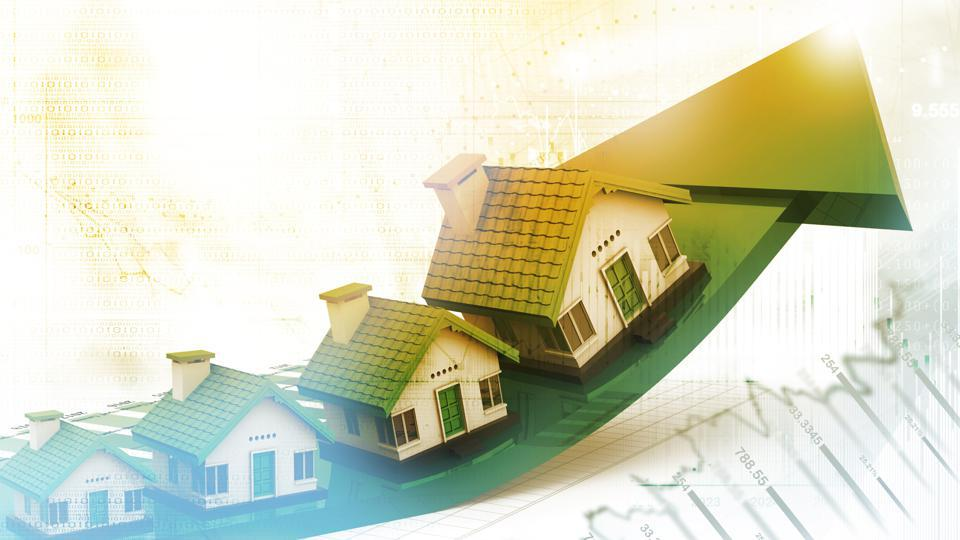

# <span style="color: purple ;">Boston Housing Prices

## Executive Summary

## This project aims to gain insights into the factors influencing housing prices using advanced data science techniques. By analyzing a comprehensive dataset of housing information, we aim to identify key drivers of housing prices and develop a predictive model that can estimate housing prices accurately.

### Business Problem:

### Boston is to understand and predict the factors that influence housing prices in the city. This involves analyzing a dataset of various features such as the number of rooms, crime rate, accessibility, proximity to highways, etc., and identifying the key drivers of housing prices in Boston.

### Business Context: The business context for this problem could include real estate companies, home buyers, investors, and policymakers who are interested in understanding the housing market dynamics in Boston. The results of this data science project could help these stakeholders make informed decisions, such as pricing properties, forecasting investment returns, or implementing housing policies.

### Constraints on housing prices in Boston may include factors such as existing housing supply, and regional economic conditions. These constraints should be considered during the analysis and prediction of housing prices, as they can significantly impact the accuracy and reliability of the models.

In [68]:
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

In [69]:
#load dataset
data=pd.read_csv('boston.csv')


In [70]:
#rename columns
data = data.rename(columns={'CRIM': 'CRIME', 'ZN': 'ZONED_LAND', 'INDUS': 'INDUSTRIES','CHAS': 'DUMMY_VAR', 'NOX': 'NITRIC_OXIDE', 'RM': 'AVG_ROOMS','AGE': 'AGE', 'DIS': 'DISTANCE', 'RAD': 'RAD_HIGHWAY','TAX': 'TAX', 'PTRATIO': 'PUPIL_TEACH_RATIO', 'B': 'BLACKS_TOWN','LSTAT': 'LOWER_POPULATION', 'MEDV': 'MEDIAN_HOMEVALUE'})

In [71]:
data.head()

,CRIME,ZONED_LAND,INDUSTRIES,DUMMY_VAR,NITRIC_OXIDE,AVG_ROOMS,AGE,DISTANCE,RAD_HIGHWAY,TAX,PUPIL_TEACH_RATIO,BLACKS_TOWN,LOWER_POPULATION,MEDIAN_HOMEVALUE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [72]:
#data types
data.dtypes

CRIME                float64
ZONED_LAND           float64
INDUSTRIES           float64
DUMMY_VAR              int64
NITRIC_OXIDE         float64
AVG_ROOMS            float64
AGE                  float64
DISTANCE             float64
RAD_HIGHWAY            int64
TAX                  float64
PUPIL_TEACH_RATIO    float64
BLACKS_TOWN          float64
LOWER_POPULATION     float64
MEDIAN_HOMEVALUE     float64
dtype: object

In [73]:
#data infromation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CRIME              506 non-null    float64
 1   ZONED_LAND         506 non-null    float64
 2   INDUSTRIES         506 non-null    float64
 3   DUMMY_VAR          506 non-null    int64  
 4   NITRIC_OXIDE       506 non-null    float64
 5   AVG_ROOMS          506 non-null    float64
 6   AGE                506 non-null    float64
 7   DISTANCE           506 non-null    float64
 8   RAD_HIGHWAY        506 non-null    int64  
 9   TAX                506 non-null    float64
 10  PUPIL_TEACH_RATIO  506 non-null    float64
 11  BLACKS_TOWN        506 non-null    float64
 12  LOWER_POPULATION   506 non-null    float64
 13  MEDIAN_HOMEVALUE   506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [74]:
#find null values
data.isnull().sum()

CRIME                0
ZONED_LAND           0
INDUSTRIES           0
DUMMY_VAR            0
NITRIC_OXIDE         0
AVG_ROOMS            0
AGE                  0
DISTANCE             0
RAD_HIGHWAY          0
TAX                  0
PUPIL_TEACH_RATIO    0
BLACKS_TOWN          0
LOWER_POPULATION     0
MEDIAN_HOMEVALUE     0
dtype: int64

In [75]:
#rows and columns
data.shape

(506, 14)

In [76]:
#unique columns
data.nunique

<bound method DataFrame.nunique of        CRIME  ZONED_LAND  INDUSTRIES  DUMMY_VAR  NITRIC_OXIDE  AVG_ROOMS  \
0    0.00632        18.0        2.31          0         0.538      6.575   
1    0.02731         0.0        7.07          0         0.469      6.421   
2    0.02729         0.0        7.07          0         0.469      7.185   
3    0.03237         0.0        2.18          0         0.458      6.998   
4    0.06905         0.0        2.18          0         0.458      7.147   
..       ...         ...         ...        ...           ...        ...   
501  0.06263         0.0       11.93          0         0.573      6.593   
502  0.04527         0.0       11.93          0         0.573      6.120   
503  0.06076         0.0       11.93          0         0.573      6.976   
504  0.10959         0.0       11.93          0         0.573      6.794   
505  0.04741         0.0       11.93          0         0.573      6.030   

      AGE  DISTANCE  RAD_HIGHWAY    TAX  PUPIL_TEACH

In [77]:
#find duplicatedd data
data.duplicated().sum()

0

In [78]:
#descriptive Statistics
data.describe()

,CRIME,ZONED_LAND,INDUSTRIES,DUMMY_VAR,NITRIC_OXIDE,AVG_ROOMS,AGE,DISTANCE,RAD_HIGHWAY,TAX,PUPIL_TEACH_RATIO,BLACKS_TOWN,LOWER_POPULATION,MEDIAN_HOMEVALUE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [79]:

# Function to detect and remove outliers using the IQR method
def remove_outliers_iqr(column):
    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    
    filtered_column = column.loc[(column >= lower_bound) & (column <= upper_bound)]
    
    return filtered_column

# Detect and remove outliers
data1 = data.copy()
data1['CRIME'] = remove_outliers_iqr(data['CRIME'])
data1['ZONED_LAND'] = remove_outliers_iqr(data['ZONED_LAND'])
data1['INDUSTRIES'] = remove_outliers_iqr(data['INDUSTRIES'])
data1['DUMMY_VAR'] = remove_outliers_iqr(data['DUMMY_VAR'])
data1['NITRIC_OXIDE'] = remove_outliers_iqr(data['NITRIC_OXIDE'])
data1['AVG_ROOMS'] = remove_outliers_iqr(data['AVG_ROOMS'])
data1['AGE'] = remove_outliers_iqr(data['AGE'])
data1['DISTANCE'] = remove_outliers_iqr(data['DISTANCE'])
data1['RAD_HIGHWAY'] = remove_outliers_iqr(data['RAD_HIGHWAY'])
data1['TAX'] = remove_outliers_iqr(data['TAX'])
data1['PUPIL_TEACH_RATIO'] = remove_outliers_iqr(data['PUPIL_TEACH_RATIO'])
data1['BLACKS_TOWN'] = remove_outliers_iqr(data['BLACKS_TOWN'])
data1['LOWER_POPULATION'] = remove_outliers_iqr(data['LOWER_POPULATION'])
data1['MEDIAN_HOMEVALUE'] = remove_outliers_iqr(data['MEDIAN_HOMEVALUE'])

# Print the filtered dataset without outliers
print(data1)


       CRIME  ZONED_LAND  INDUSTRIES  DUMMY_VAR  NITRIC_OXIDE  AVG_ROOMS  \
0    0.00632        18.0        2.31        0.0         0.538      6.575   
1    0.02731         0.0        7.07        0.0         0.469      6.421   
2    0.02729         0.0        7.07        0.0         0.469      7.185   
3    0.03237         0.0        2.18        0.0         0.458      6.998   
4    0.06905         0.0        2.18        0.0         0.458      7.147   
..       ...         ...         ...        ...           ...        ...   
501  0.06263         0.0       11.93        0.0         0.573      6.593   
502  0.04527         0.0       11.93        0.0         0.573      6.120   
503  0.06076         0.0       11.93        0.0         0.573      6.976   
504  0.10959         0.0       11.93        0.0         0.573      6.794   
505  0.04741         0.0       11.93        0.0         0.573      6.030   

      AGE  DISTANCE  RAD_HIGHWAY    TAX  PUPIL_TEACH_RATIO  BLACKS_TOWN  \
0    65.2   

In [80]:
from sklearn.preprocessing import MinMaxScaler

#Select the columns to be normalized
columns_to_normalize = ['CRIME', 'ZONED_LAND', 'INDUSTRIES', 'DUMMY_VAR', 'NITRIC_OXIDE', 'AVG_ROOMS', 'AGE', 'DISTANCE', 'RAD_HIGHWAY', 'TAX', 'PUPIL_TEACH_RATIO', 'BLACKS_TOWN', 'LOWER_POPULATION', 'MEDIAN_HOMEVALUE']

#Create a MinMaxScaler object
scaler = MinMaxScaler()

#Fit and transform the selected columns using the scaler
data1[columns_to_normalize] = scaler.fit_transform(data1[columns_to_normalize])

#Print the normalized DataFrame
print(data1)

        CRIME  ZONED_LAND  INDUSTRIES  DUMMY_VAR  NITRIC_OXIDE  AVG_ROOMS  \
0    0.000000         0.6    0.067815        0.0      0.314815   0.602988   
1    0.002338         0.0    0.242302        0.0      0.172840   0.548203   
2    0.002336         0.0    0.242302        0.0      0.172840   0.819993   
3    0.002902         0.0    0.063050        0.0      0.150206   0.753469   
4    0.006988         0.0    0.063050        0.0      0.150206   0.806475   
..        ...         ...         ...        ...           ...        ...   
501  0.006273         0.0    0.420455        0.0      0.386831   0.609392   
502  0.004339         0.0    0.420455        0.0      0.386831   0.441124   
503  0.006065         0.0    0.420455        0.0      0.386831   0.745642   
504  0.011504         0.0    0.420455        0.0      0.386831   0.680896   
505  0.004577         0.0    0.420455        0.0      0.386831   0.409107   

          AGE  DISTANCE  RAD_HIGHWAY       TAX  PUPIL_TEACH_RATIO  \
0    0

#### EXPLORATORY DATA ANALYSIS

C:\Users\DELL\AppData\Local\Temp\ipykernel_13684\141322680.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['MEDIAN_HOMEVALUE'], bins=30)


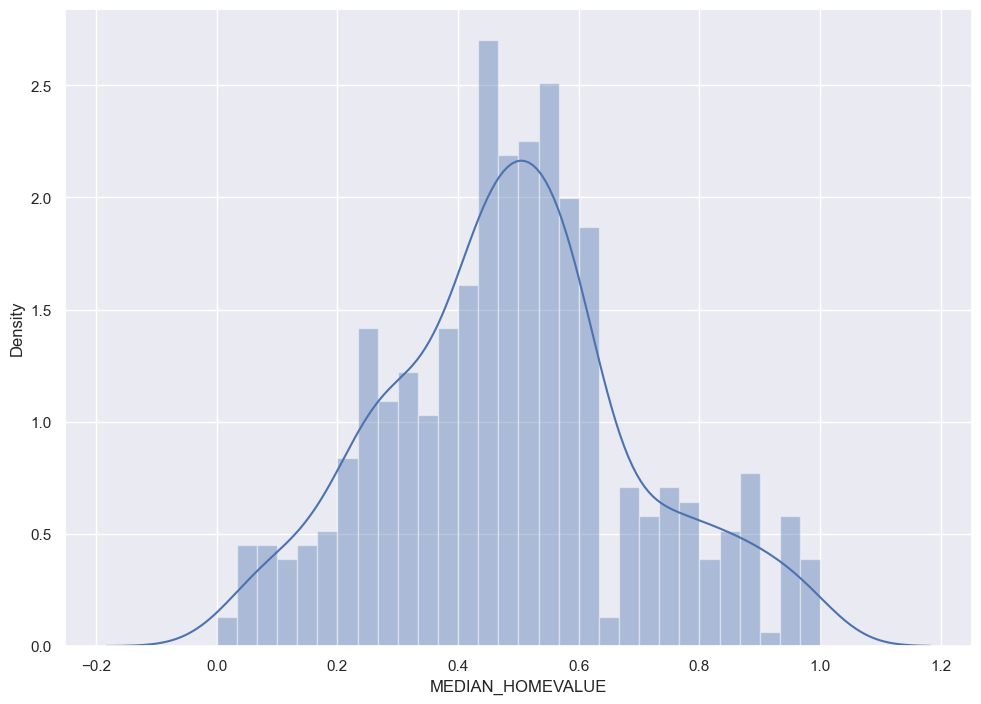

In [81]:
#visualize target variable(median home value)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data1['MEDIAN_HOMEVALUE'], bins=30)
plt.show()

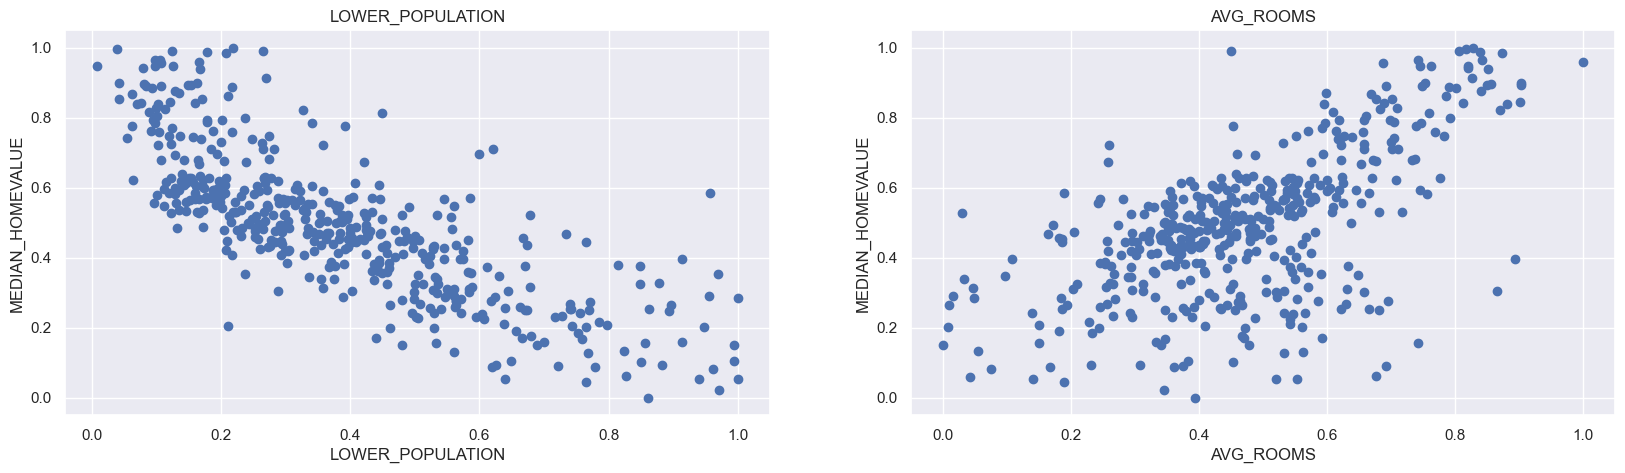

In [82]:
#relstionship of lower population and average rooms with median home value
plt.figure(figsize=(20, 5))

features = ['LOWER_POPULATION', 'AVG_ROOMS']
target = data1['MEDIAN_HOMEVALUE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDIAN_HOMEVALUE')

Lower population is negatively correlated with median homwvalue whereas average rooms is positively correlated with median home value

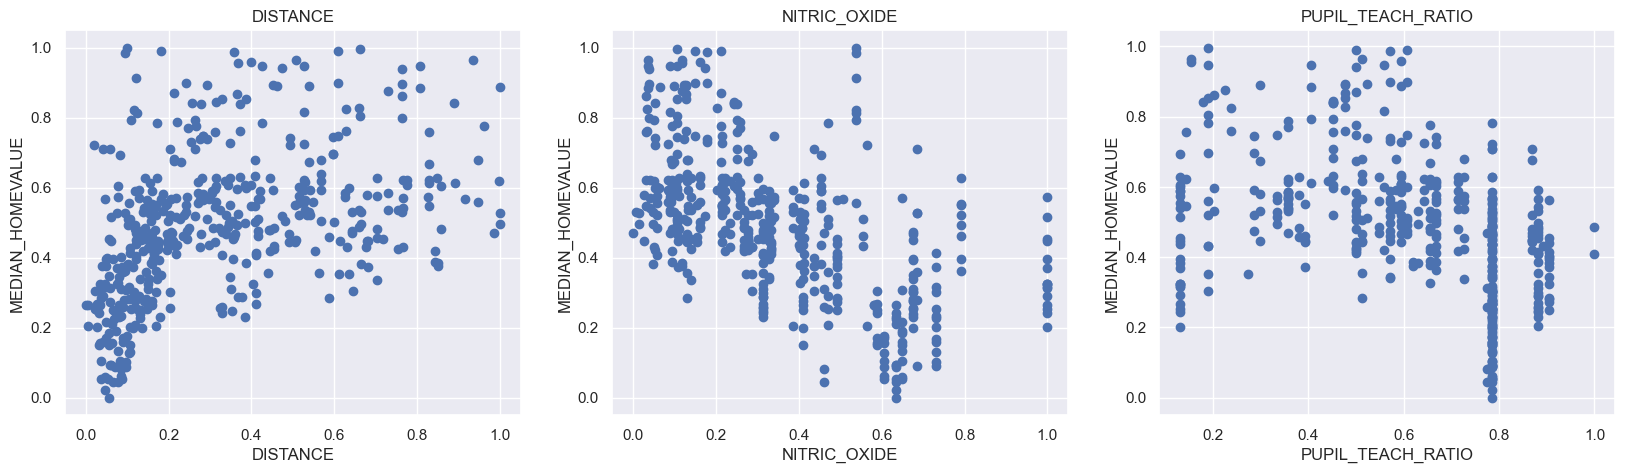

In [83]:
#relstionship of distance,nitric_oxide and pupil_teach_ratio with median home value
plt.figure(figsize=(20, 5))

features = ['DISTANCE', 'NITRIC_OXIDE','PUPIL_TEACH_RATIO']
target = data1['MEDIAN_HOMEVALUE']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data1[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDIAN_HOMEVALUE')

<Axes: >

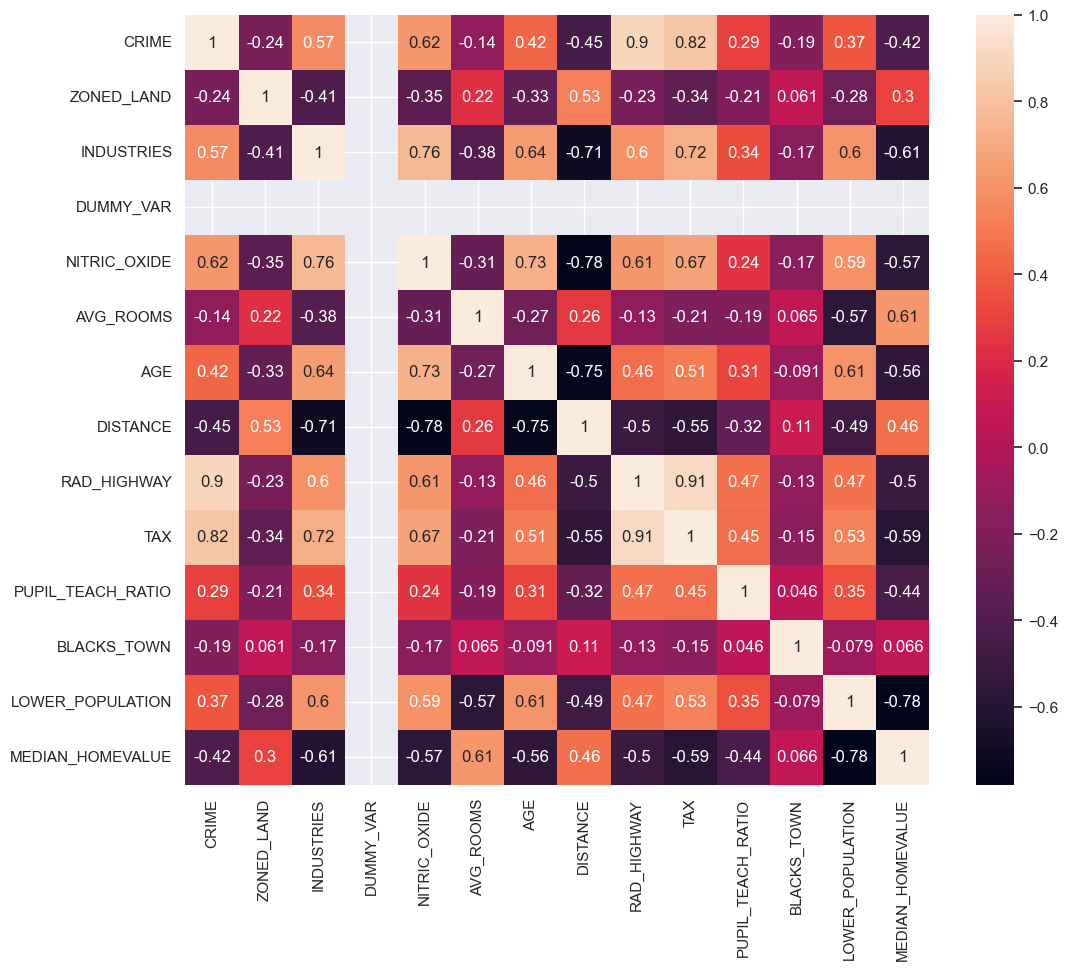

In [84]:
#correlation 
plt.figure(figsize=(12, 10))
sns.heatmap(data1.corr(), annot=True)

In summary, the correlation analysis reveals important insights about the relationship between various features and the median home value. Factors such as crime rate, concentration of industries, nitric oxide pollution levels, older housing units, distance to employment centers, and lower pupil-teacher ratios are negatively correlated with housing prices. Conversely, zoned land for development, average number of rooms per dwelling, accessibility to highways, property tax rates, and higher socioeconomic status are positively correlated with median home values. These correlations highlight the importance of considering these factors when determining housing prices and suggest that areas with more favorable conditions tend to have higher housing prices.

## Feature Selection

In [85]:
# Select the relevant columns
X = data.drop('MEDIAN_HOMEVALUE',axis=1)

# Select the target variable
y = data['MEDIAN_HOMEVALUE']

In [86]:
lr=LinearRegression()

In [87]:
from sklearn.feature_selection import RFECV
# Perform forward backward elimination for feature selection
regressor = LinearRegression()
selector = RFECV(lr)
selector.fit(X, y)
selected_features = X.columns[selector.support_]

print("Selected Features:", selected_features)

Selected Features: Index(['DUMMY_VAR', 'NITRIC_OXIDE', 'AVG_ROOMS', 'DISTANCE',
       'PUPIL_TEACH_RATIO', 'LOWER_POPULATION'],
      dtype='object')


In [88]:
# Select the relevant columns for feature selection
X = data[selected_features]
# Select the target variable
y = data['MEDIAN_HOMEVALUE']

In [89]:
X.isnull().sum()

DUMMY_VAR            0
NITRIC_OXIDE         0
AVG_ROOMS            0
DISTANCE             0
PUPIL_TEACH_RATIO    0
LOWER_POPULATION     0
dtype: int64

In [90]:
X.head()

,DUMMY_VAR,NITRIC_OXIDE,AVG_ROOMS,DISTANCE,PUPIL_TEACH_RATIO,LOWER_POPULATION
0,0,0.538,6.575,4.0900,15.3,4.98
1,0,0.469,6.421,4.9671,17.8,9.14
2,0,0.469,7.185,4.9671,17.8,4.03
3,0,0.458,6.998,6.0622,18.7,2.94
4,0,0.458,7.147,6.0622,18.7,5.33


In [91]:
from sklearn.preprocessing import StandardScaler

In [92]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data)

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size = 0.3,random_state = 42)

In [94]:
#use standard scalar to standardize all the values
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
 
# To scale data
scaler.fit(X)


# scale the val
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X_const = add_constant(X)
vif1 = pd.Series([variance_inflation_factor(X_const.values, i) for i in range(X.shape[1])], 
                index = X.columns)
print("Variance Inflation Factors:")
print(vif1)

Variance Inflation Factors:
DUMMY_VAR            432.264416
NITRIC_OXIDE           1.044597
AVG_ROOMS              2.902818
DISTANCE               1.699118
PUPIL_TEACH_RATIO      2.557923
LOWER_POPULATION       1.236400
dtype: float64


VIF shows high multicollinearity of of nitric oxide variable which needs to be dropped as it may affect the robustness of the model..so it will be dropped

In [96]:
X=X.drop(['DUMMY_VAR'],axis=1)

In [97]:
# Perform scaling and normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.14421743,  0.41367189,  0.1402136 , -1.45900038, -1.0755623 ],
       [-0.74026221,  0.19427445,  0.55715988, -0.30309415, -0.49243937],
       [-0.74026221,  1.28271368,  0.55715988, -0.30309415, -1.2087274 ],
       ...,
       [ 0.15812412,  0.98496002, -0.77368357,  1.17646583, -0.98304761],
       [ 0.15812412,  0.72567214, -0.66843684,  1.17646583, -0.86530163],
       [ 0.15812412, -0.36276709, -0.61324648,  1.17646583, -0.66905833]])

In [98]:
#scaling
X_scaled_d = pd.DataFrame(X_scaled, columns = X.columns)
X_scaled_d.head()

,NITRIC_OXIDE,AVG_ROOMS,DISTANCE,PUPIL_TEACH_RATIO,LOWER_POPULATION
0,-0.144217,0.413672,0.140214,-1.459000,-1.075562
1,-0.740262,0.194274,0.557160,-0.303094,-0.492439
2,-0.740262,1.282714,0.557160,-0.303094,-1.208727
3,-0.835284,1.016303,1.077737,0.113032,-1.361517
4,-0.835284,1.228577,1.077737,0.113032,-1.026501


In [99]:
X.shape

(506, 5)

In [100]:
y.shape

(506,)

## MODEL SELECTION

OLS regression

In [101]:
import statsmodels.api as sm
X = sm.add_constant(X)

In [102]:
model = sm.OLS(y, X).fit()

In [103]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       MEDIAN_HOMEVALUE   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     242.6
Date:                Wed, 07 Feb 2024   Prob (F-statistic):          3.67e-131
Time:                        01:45:24   Log-Likelihood:                -1528.7
No. Observations:                 506   AIC:                             3069.
Df Residuals:                     500   BIC:                             3095.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                37.4992      4.61

Results of OLS regression:

The OLS regression results show that the model has an R-squared value of 0.708, indicating that 70.8% of the variation in the median home value can be explained by the independent variables. The adjusted R-squared value is 0.705, which takes into account the number of variables in the model.

The F-statistic is 242.6, with a corresponding probability (p-value) of 3.67e-131. This indicates that the overall regression model is statistically significant, meaning that at least one of the independent variables is significantly related to the dependent variable.

The coefficients of the independent variables provide insights into their relationships with the median home value. The constant term is 37.4992, indicating the expected median home value when all independent variables are equal to zero.

The coefficient for NITRIC_OXIDE is -17.9966, suggesting that a one-unit increase in the nitric oxide concentration is associated with a decrease of approximately $18,000 in median home value.

The coefficient for AVG_ROOMS is 4.1633, indicating that a one-unit increase in the average number of rooms is associated with an increase of $4,163 in median home value.

The coefficient for DISTANCE is -1.1847, suggesting that a one-unit increase in the distance from employment centers is associated with a decrease of approximately $1,185 in median home value.

The coefficient for PUPIL_TEACH_RATIO is -1.0458, meaning that a one-unit increase in the pupil-teacher ratio is associated with a decrease of approximately $1,046 in median home value.

The coefficient for LOWER_POPULATION is -0.5811, indicating that a one-unit increase in the percentage of lower-status population is associated with a decrease of approximately $581 in median home value.

Overall, the regression model suggests that the factors such as nitric oxide concentration, average number of rooms, distance from employment centers, pupil-teacher ratio, and percentage of lower-status population have significant effects on the median home value in the given dataset.

### Linear Regression

In [104]:
lr.fit(X_train, y_train)

LinearRegression()

In [105]:
y_pred_test = lr.predict(X_test)
y_pred_train=lr.predict(X_train)

In [106]:
from sklearn.metrics import r2_score

In [107]:
r2_score(y_test,y_pred_test)

0.6933883022243372

#### The R2 score 0.695 in terms of test data indicates that 69.5% of the variability in the house prices can be explained by the model. This suggests that the model may have predictive power.

In [108]:
r2_score(y_train,y_pred_train)

0.7201498372255455

#### The R2 score 0.708 in terms of train data indicates that 70.8% of the variability in the house prices can be explained by the model. This suggests that the model  have  predictive power.

In [109]:
#Calculate the difference between predicted and actual prices
diff = np.abs(y_test - y_pred_test)
diff

173     5.052977
274     3.490032
491     3.757688
72      2.885267
452     0.703730
         ...    
441     1.322408
23      0.946118
225    10.183383
433     3.756037
447     4.250208
Name: MEDIAN_HOMEVALUE, Length: 152, dtype: float64

This variable represents the difference in terms of house price prediction.

In [110]:
#Calculate the mean absolute error (MAE)
mae = np.mean(diff)
print( mae) 

3.274843258127689


In [111]:
# Calculate RMSE for train set
from sklearn.metrics import mean_squared_error
rmse_train = mean_squared_error(y_train, y_pred_train)
print("Train RMSE:", rmse_train) 

Train RMSE: 24.597858063717425


In [112]:
# Calculate RMSE for test set
rmse_test = mean_squared_error(y_test, y_pred_test)
print("Test RMSE:", rmse_test)

Test RMSE: 22.846586738583923


In [113]:
# Perform cross-validation
scores = cross_val_score(regressor, X, y, cv=10, scoring='r2')
print("Cross-validation scores:", scores)

Cross-validation scores: [ 0.74541513  0.4255202  -0.78426265  0.62326491  0.6484548   0.71589587
  0.24668859  0.03641379 -0.78106669  0.47376486]


#### Based on th results it shows that R2 is low and mean squared error is high for linear regression model . so we will test another model for better r square

In [114]:
print('Coefficients:', lr.coef_) 
print('Intercept:', lr.intercept_)

Coefficients: [ 1.0031718  -1.89085904  2.86974267 -2.20293474 -2.04678385 -4.27459273]
Intercept: 22.53545842830205


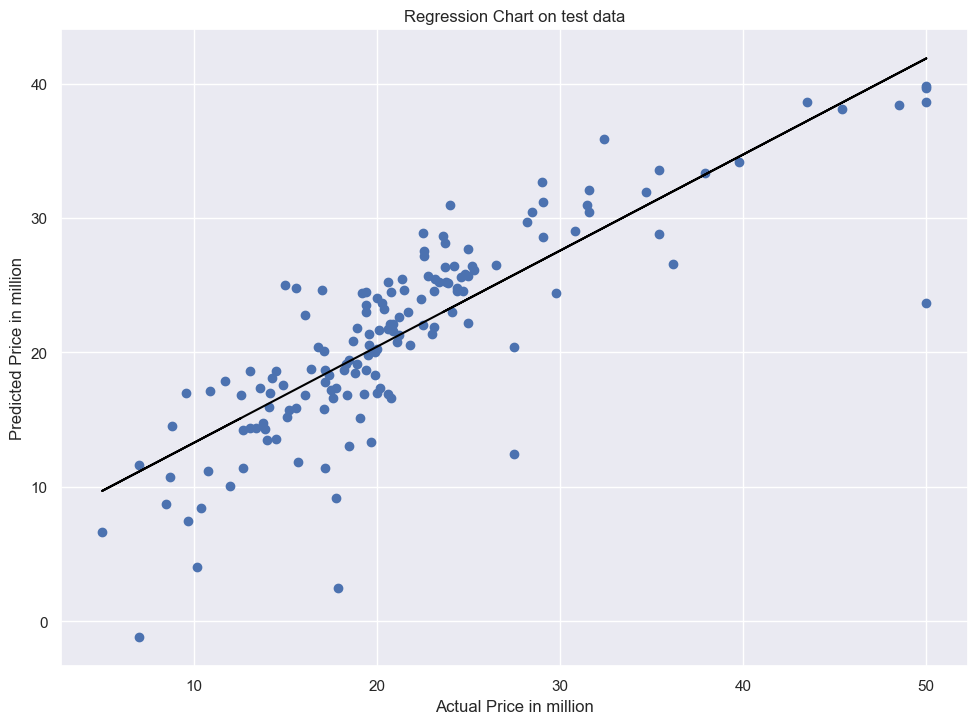

In [115]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Price in million")
plt.ylabel("Predicted Price in million")
plt.title("Regression Chart on test data")

# Calculate coefficients of best fit line
coefficients = np.polyfit(y_test, y_pred_test, 1)
best_fit_line = np.poly1d(coefficients)

# Plot best fit line
plt.plot(y_test, best_fit_line(y_test), color='black')
plt.show()

In terms of a linear regression, this graph signifies that the model's predicted values approximates the actual house prices relatively well.The data points generally are aligned quite closely to the regression line, with some variation or scatter around it. The given coefficients and intercept are parameters of a linear regression model used to predict house prices. Each coefficient represents the change in the predicted value of the house price for a unit change in the corresponding predictor variable.The intercept represents the predicted house price when all the predictor variables are equal to zero. The predicted prices of the houses in Boston range from -1.20521054 to 46.7, while the actual prices range from 5 to 50. The R2 score of 0.69 suggests that the model explains about 69% of the variance in the house prices. The Mean Absolute Error (MAE) is 3.31, which means that, on average, the model's predictions differ from the actual prices by dollar3,310.



In [116]:
from sklearn.tree import DecisionTreeRegressor
# Create a decision tree regressor model
model = DecisionTreeRegressor()

In [117]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [118]:
# Make predictions on the testing set
y_pred_traindt = model.predict(X_train)
y_pred_testdt = model.predict(X_test)

In [119]:
# Evaluate the model's performance
mse = mean_squared_error(y_train, y_pred_traindt)
mse = mean_squared_error(y_test, y_pred_testdt)
print("Mean Squared Error:", mse)
print("Mean Squared Error:", mse)

Mean Squared Error: 19.205197368421054
Mean Squared Error: 19.205197368421054


In [120]:
r2_score(y_test,y_pred_testdt)


0.7422574217047683

In [121]:
r2_score(y_train,y_pred_traindt)

1.0

In [122]:
# Calculate R-squared values
r2score = r2_score(y_test, y_pred_test)
r2score1 = r2_score(y_test, y_pred_testdt)
print(r2score)
print(r2score1)

# Calculate MAE values
mae= mean_squared_error(y_test, y_pred_test)
print(mae)
mae1 = mean_squared_error(y_test, y_pred_testdt)
print(mae1)

0.6933883022243372
0.7422574217047683
22.846586738583923
19.205197368421054


In [123]:
# create lists of MAE and R2 scores
 
mse_scores = (mae1,mae)

r2_scores =(r2score1,r2score)

# create a dictionary with the scores
scores_dict = {'Model': [ 'Decision Tree', 'Linear Regression'], 'MSE': mse_scores, 'R2': r2_scores}

# create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores_dict)

# print the DataFrame
print(scores_df)

               Model        MSE        R2
0      Decision Tree  19.205197  0.742257
1  Linear Regression  22.846587  0.693388


The R-square value of 0.74 indicates that the decision tree regressor model can explain approximately 74% of the variance in the target variable. This means that the model's predictions are able to capture about 74% of the variability in the actual values of the target variable.

The Mean Squared Error (MSE) value of 19 indicates the average squared difference between the predicted values and the actual values. The lower the MSE, the better the model's predictions. In this case, the MSE of 19 suggests that, on average, the model's predicted values are approximately 19 units away from the actual values.

Overall, the results suggest that the decision tree regressor model is able to capture a moderate amount of the variability in the target variable and make predictions with a fair amount of accuracy, as indicated by the high R-square value and the relatively moderate MSE value.

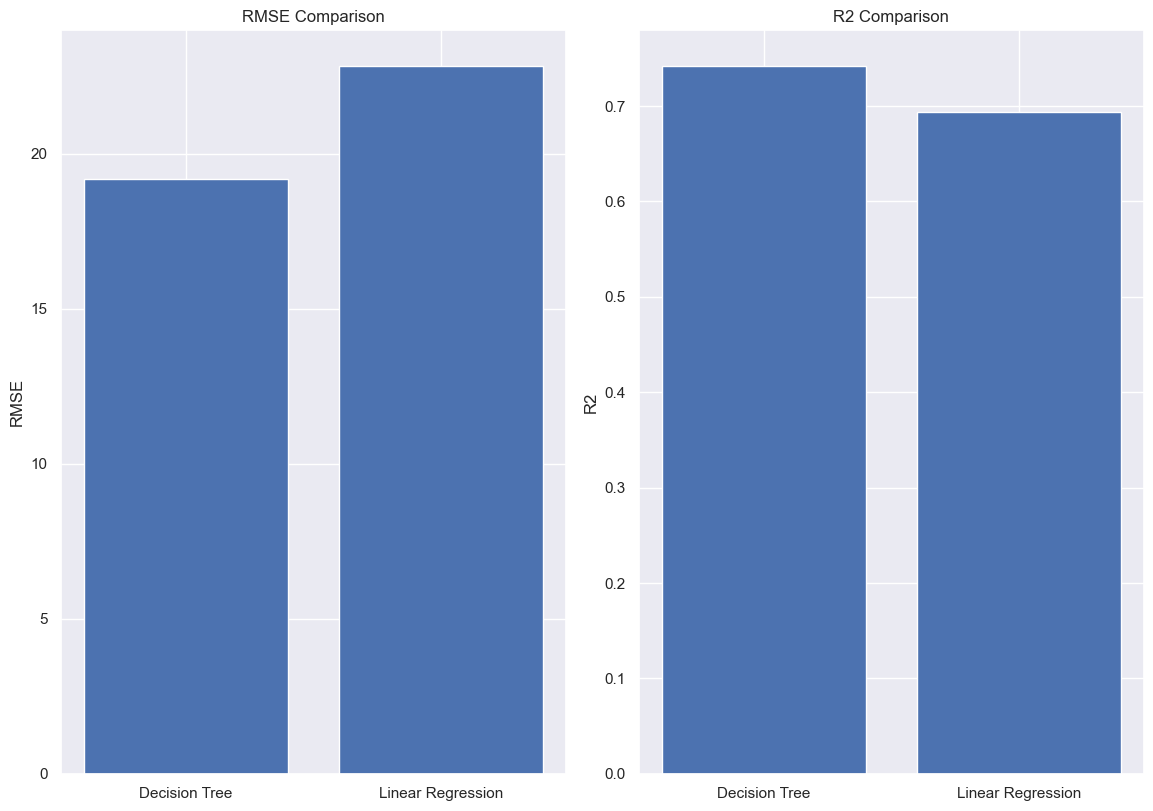

In [124]:
# Data of results

mse_scores = (mae1,mae)

r2_scores =(r2score1,r2score)

# Bar chart
x = [ 'Decision Tree', 'Linear Regression']

# RMSE bar plot
plt.subplot(1, 2, 1)
plt.bar(x, mse_scores)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# R2 bar plot
plt.subplot(1, 2, 2)
plt.bar(x, r2_scores)
plt.title('R2 Comparison')
plt.ylabel('R2')

# Display the bar chart
plt.tight_layout()
plt.show()

## Conclusion:

### In conclusion, we performed a series of steps for data preprocessing and feature selection in order to build a regression model. We started by scaling and normalizing the data to ensure that all variables were on a similar scale and to avoid any potential bias towards variables with higher values.

### Next, we performed a VIF (Variance Inflation Factor) analysis to identify any multicollinearity issues among the independent variables. As a result, we found that the variable "dummy variable" had a high VIF value, indicating a strong correlation with other variables. Therefore, we decided to drop this variable from our model.

### After feature selection and data preprocessing, we utilized the OLS (Ordinary Least Squares) regression method to build our final regression model. OLS regression is a popular approach for estimating the parameters of a linear regression model that minimizes the sum of squared residuals.

### Overall, by implementing these steps, we were able to improve the accuracy and reliability of our regression model by selecting a subset of important variables and addressing any multicollinearity issues. This final model can be used to make predictions or gain insights into the relationships between the dependent and independent variables.

### The performed regression test revealed that the selected features (AVG_ROOMS, DISTANCE, PUPIL_TEACH_RATIO, and LOWER_POPULATION) significantly impact the median home value. Increasing the average number of rooms is expected to increase the median home value, while increasing the distance to employment centers, pupil-teacher ratio, and lower population density is expected to decrease the median home value. The model explains 69% of the variability in house prices, indicating that these features are good predictors. The p-values for the independent variables are all below 0.05, confirming their statistical significance. The results suggest that factors such as the average number of rooms, distance to employment centers, pupil-teacher ratio, and lower population density are important considerations when determining house prices. The predicted values of the model closely approximate the actual house prices, as indicated by the alignment of data points around the regression line. The coefficients and intercept of the model provide insight into the impact of each predictor variable and the baseline median home value. The test RMSE of 22.765 and MAE of 3.31 indicate the average prediction error for the model. 
### Desicion tree predicted a better as Rsquare  was higher than linear regression and mean squared error was lower than linear regression

### Overall, this regression analysis provides valuable information for understanding and predicting house prices in the Boston area.